<a href="https://colab.research.google.com/github/GoZaZombie/CTIP-Assignment-2/blob/main/GRUTrainSpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



#import datasets
SpamData1 = pd.read_csv('emails.csv', encoding='latin-1', on_bad_lines='skip')
#print(SpamData1.tail(20))

SpamData2 = pd.read_csv('sms_dataset.csv', encoding='latin-1')
#print(SpamData2.tail(20))

#Normalizing the column name scheme
SpamData2 = SpamData2.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
SpamData2 = SpamData2.rename(columns={'v1': 'Classification', 'v2': 'Message'})
SpamData1 = SpamData1.rename(columns={'text': 'Message','spam': 'Classification'})
#reorder Columns
SpamData1 = SpamData1[['Message', 'Classification']]
SpamData2 = SpamData2[['Message', 'Classification']]
#normalize values for spam and "ham"
SpamData2.loc[SpamData2['Classification'] == 'spam', 'Classification'] = 1
SpamData2.loc[SpamData2['Classification'] == 'ham', 'Classification'] = 0





#debugging
##print(SpamData1.tail(20))
#print(SpamData2.tail(20))

#join the data sets
SpamData = pd.concat([SpamData1, SpamData2], ignore_index=True)

#debugging
#print(SpamData.tail(20))


tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>") #handles words that were unseen during training and stops it from crashing
tokenizer.fit_on_texts(SpamData['Message']) #targets messages since thats where the unseen words will appear (alot have random jumbles of letters/symbols)

sequences = tokenizer.texts_to_sequences(SpamData['Message'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding= 'post') #padds the the sequences to make them the same length by using 0's has placeholders




GRUModel = Sequential([  #defines the details of the model
    Embedding(input_dim=5000, output_dim=128),  #note input_dim isn't here since it throws and error, newer keras seem to automatically detect input length
    GRU(32),
    Dense(1, activation='sigmoid')
])
X = padded_sequences
Y = SpamData['Classification'] #seperates the data into x and y. x being the messages and y being the classification.
X_TrainData, X_TestData, Y_TrainData, Y_TestData = train_test_split(X, Y , test_size=0.2, random_state =42) #splits the data into training and testing sets, currently 80 - 20 split

Y_TestData = np.array(Y_TestData, dtype=int)
Y_TrainData= np.array(Y_TrainData,  dtype=int) #issues with the model training, needed to covert it to integers and np.arrays

X_TrainData = np.array(X_TrainData)
X_TestData = np.array(X_TestData)



GRUModel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
FirstIteration = GRUModel.fit(
    X_TrainData,
    Y_TrainData,
    epochs=5,
    batch_size=32,
    validation_data=(X_TestData, Y_TestData),
    verbose=1
)


#debugging
#print(TrainData.tail(20))
#print(TestData.tail(20))

ParserError: Error tokenizing data. C error: EOF inside string starting at row 4074

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9792 - loss: 0.0838
Test Loss: 0.07489598542451859
Test Accuracy: 0.9792035222053528


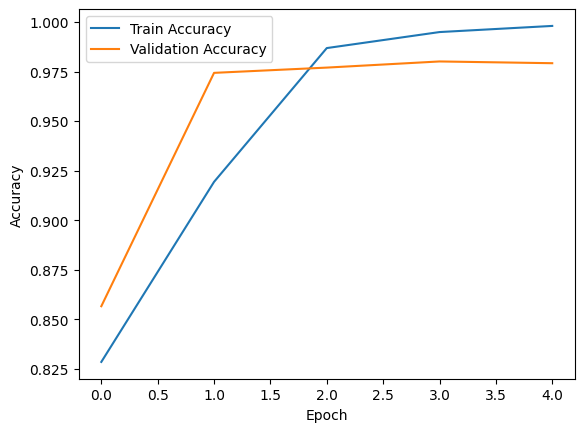

In [ ]:
loss, accuracy = GRUModel.evaluate(X_TestData, Y_TestData)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.plot(FirstIteration.history['accuracy'], label='Train Accuracy')
plt.plot(FirstIteration.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
